<a href="https://colab.research.google.com/github/ev1025/Ticketing-Prediction/blob/main/%EC%A4%91%EA%B0%84%EC%A0%95%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 데이터 전처리

1. membership.csv : 고객 데이터(고객번호, 나이, 직업, 좋아하는 선수)
   - zipcode와 job이 결측치이고 좋아하는 선수가 무고사인 고객이 많음
   - 회원가입시 기본 값으로 예상됨
   - zipcode의 결측치를 0으로 job의 결측치를 '기타'로 채워줌


2. reserve_ticket.csv : 티켓 판매 데이터(주문번호, 고객번호, 주문시간, 경기시간, 취소유무, 티켓번호, 예매좌석 정보)
   - 스카이라운지는 열 번호가 없어서 seat_Attribute_5 컬럼을 'sky'로 채워줌
   - 중복된 컬럼이 있어서 detail_cancel_date_time 컬럼 제거
   - 예매, 예매취소 시간이 나누어져 있어서 한 컬럼으로 합침
   - 기타 게임시간 관련 컬럼을 생성 및 추가(경기시간 datetime, 요일, 월 컬럼 추가)
   - df4에서 경기 상대 팀 정보 가져와서 merge


3. d95e264436cf42de.xlsx : 프로팀 일자별 순위
   - 2022년 경기 순위만 남기고 제거


4. schedule2022120221019212245.xml : 경기 결과(경기시간, 경기정보, 관객 수)
   - 한글 인코딩 문제가 발생하여, 디코딩 후 인코딩을 진행하고 다시 디코딩하여 문제 해결
   - 승부차기 내역이 없어서 home_team_tk, away_team_tk 컬럼 삭제
   - 게임시간 컬럼을 datetime형식으로, 요일 컬럼을 숫자로 변경

## 데이터 분석

### 요일별 시간별 경기 수

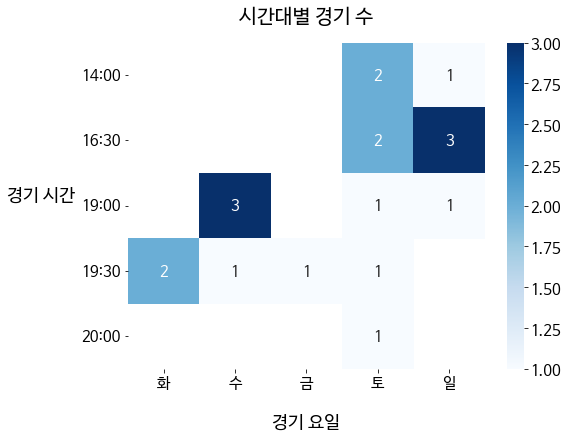

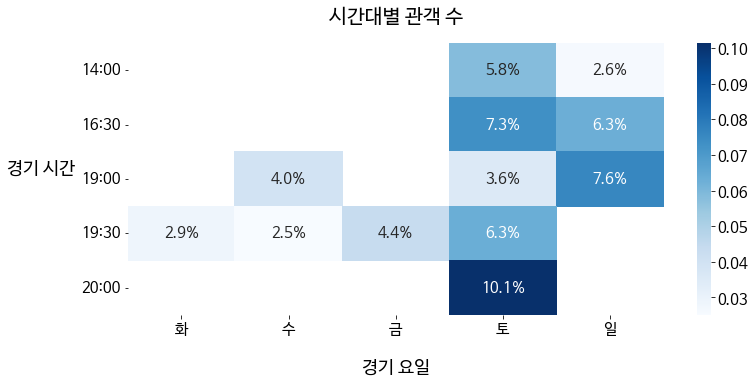

---

### 고객 리텐션 확인을 위한 코호트분석

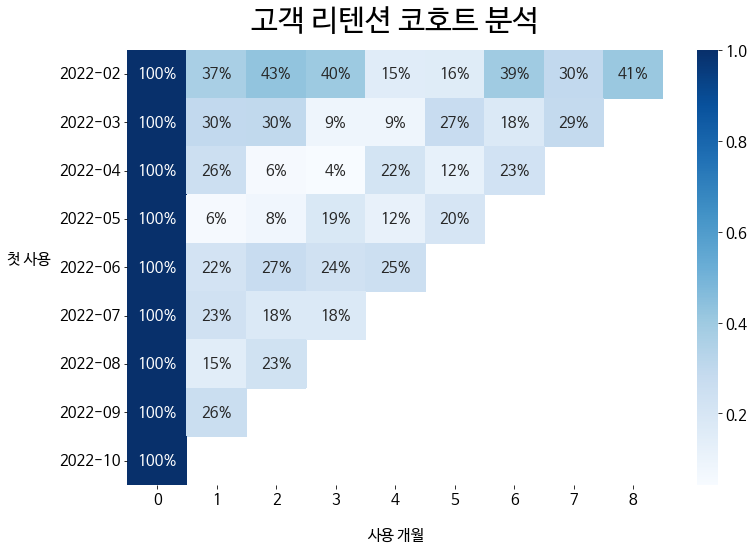

- 5~6월 코로나 이슈로 인한 방문률 감소
- 시즌 초기부터 방문하던 고객층은 높은 유지율을 보임
- 전체적으로 견조한 유지율 흐름


---

### 티켓 예매정보

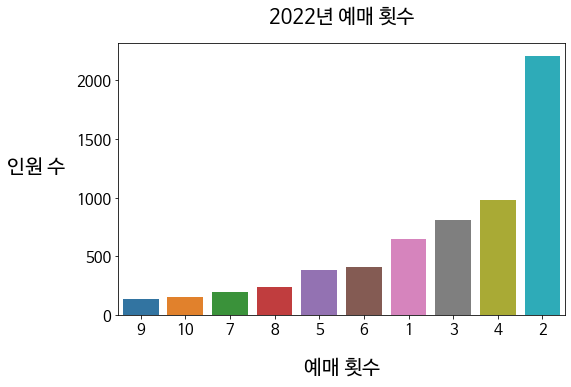



- 보통 한 시즌에 2회 예매하는 경우가 가장 많았고, 상위권이 모두 5회 미만 예매자들이었다.
- 예매횟수 5회를 기준으로 이벤트를 진행하는건 어떨까?
   - 5회 정액권 할인 판매(고급좌석 포함)
   - 5회 이상 예매 시 고급 좌석 예매 할인
   - 4회 중 2회 이상 고급좌석 예매 시 일반석 제공이나 50% 할인


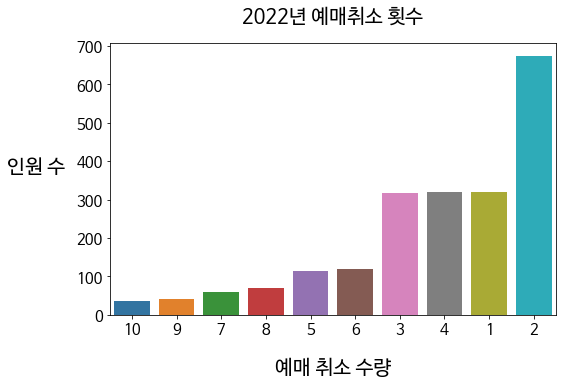

- 5회 미만 관램객에서 취소거래도 많이 나타남
- 취소하지 않도록 관리 필요!   


---

### 좌석 인기 순위

- 구역 인기순위

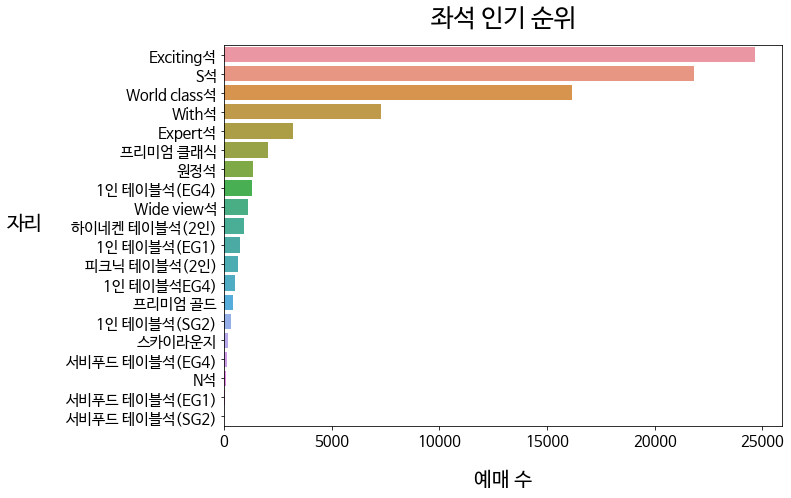

- 좌석 인기 순위 : 주로 전방 좌석이 차지했다.

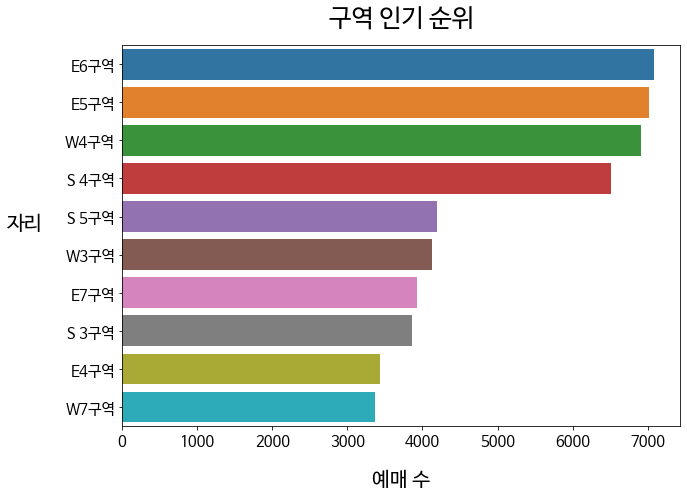

- 검은색으로 표시된 전방에 위치한 좌석들이 인기가 많다.

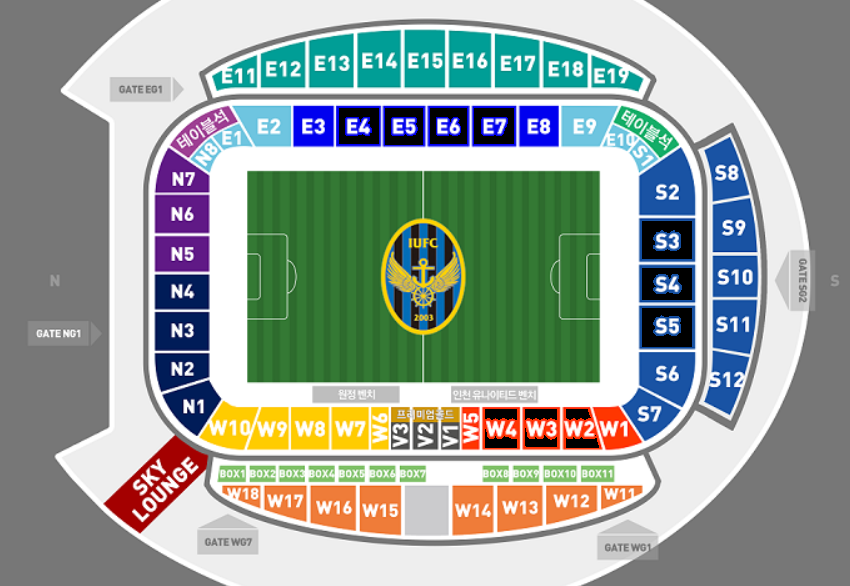

- 이용자의 대다수가 회사원

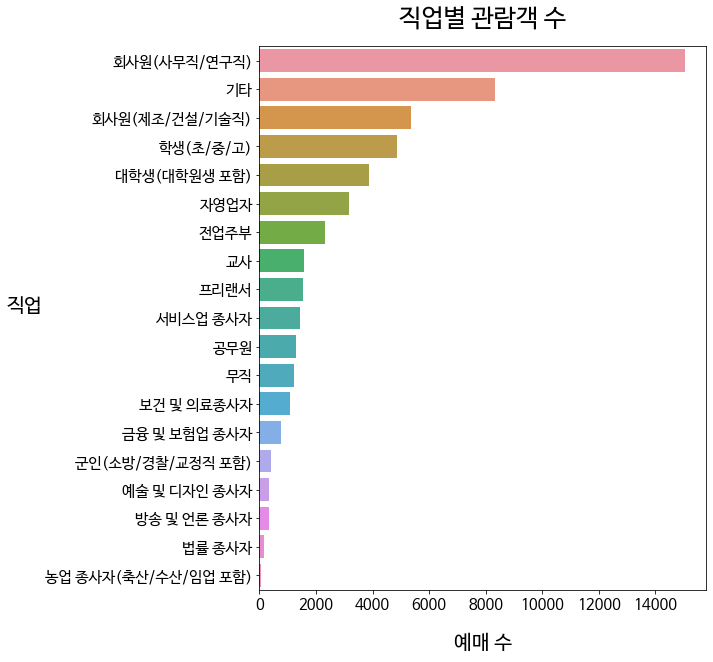

**Top4구역 (Exciting, World Class, S, With)의 구매자의 특징**
- 70년대 중반~ 80년대 초 연령에서 청소년/어린이 예매가 활발하다.
- 미성년자 관람객의 비율은 전체의 24.61%
- 이 고객군에 가족할인이나 청소년 관련 할인쿠폰을 제공하여 쿠폰사용률을 늘린다.

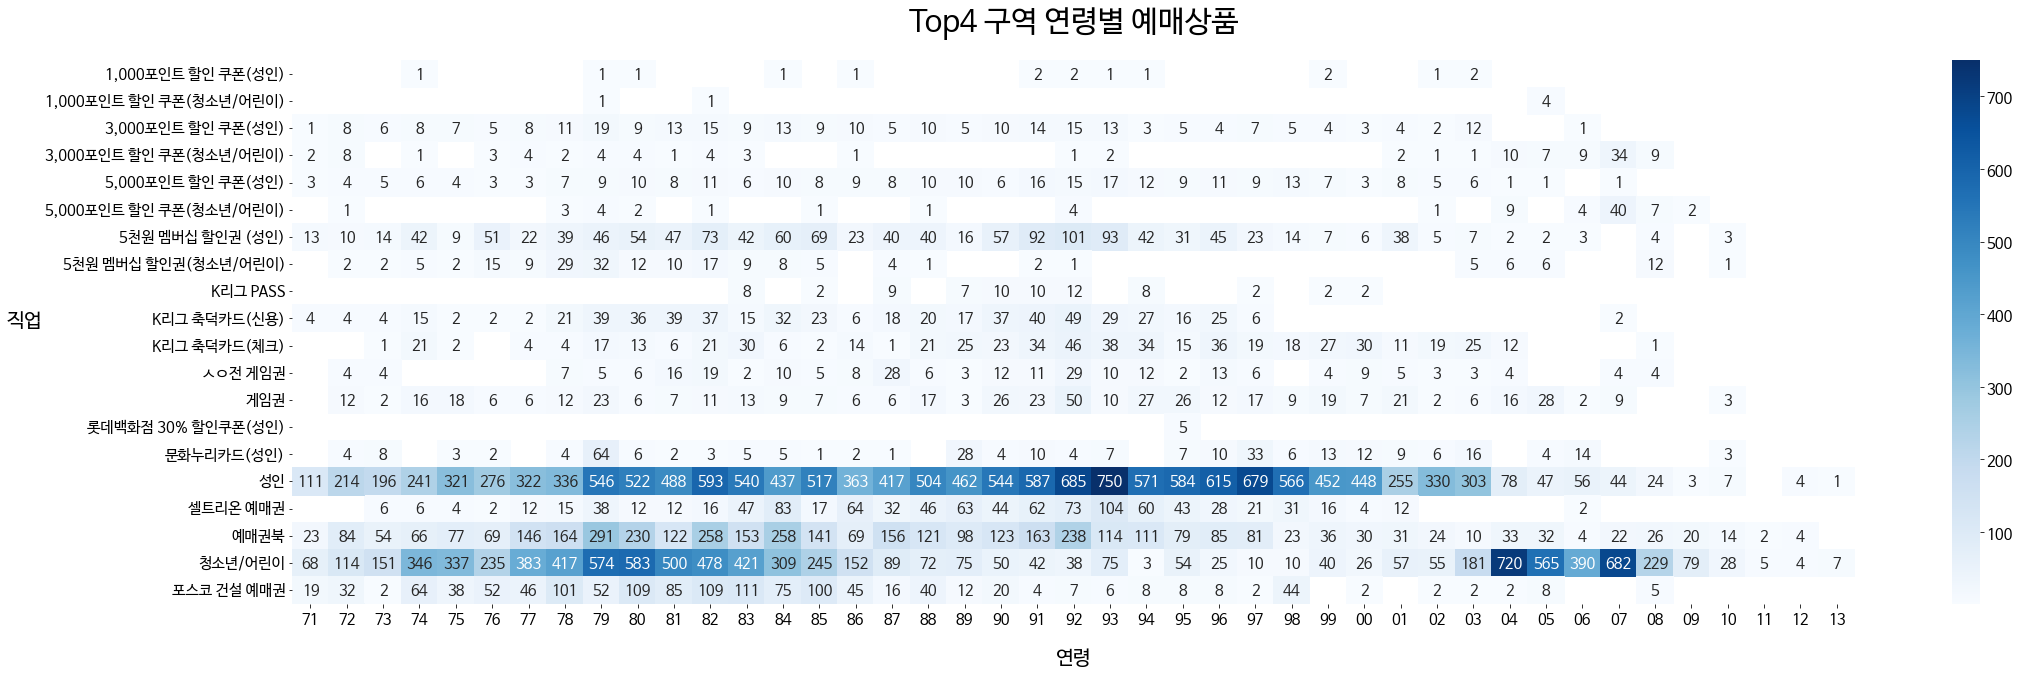

- 실제로 청소년/어린이 이용자는 할인비중이 적은 것을 볼 수 있다.
- 가족단위의 관람을 위해 가족 할인을 제공한다.

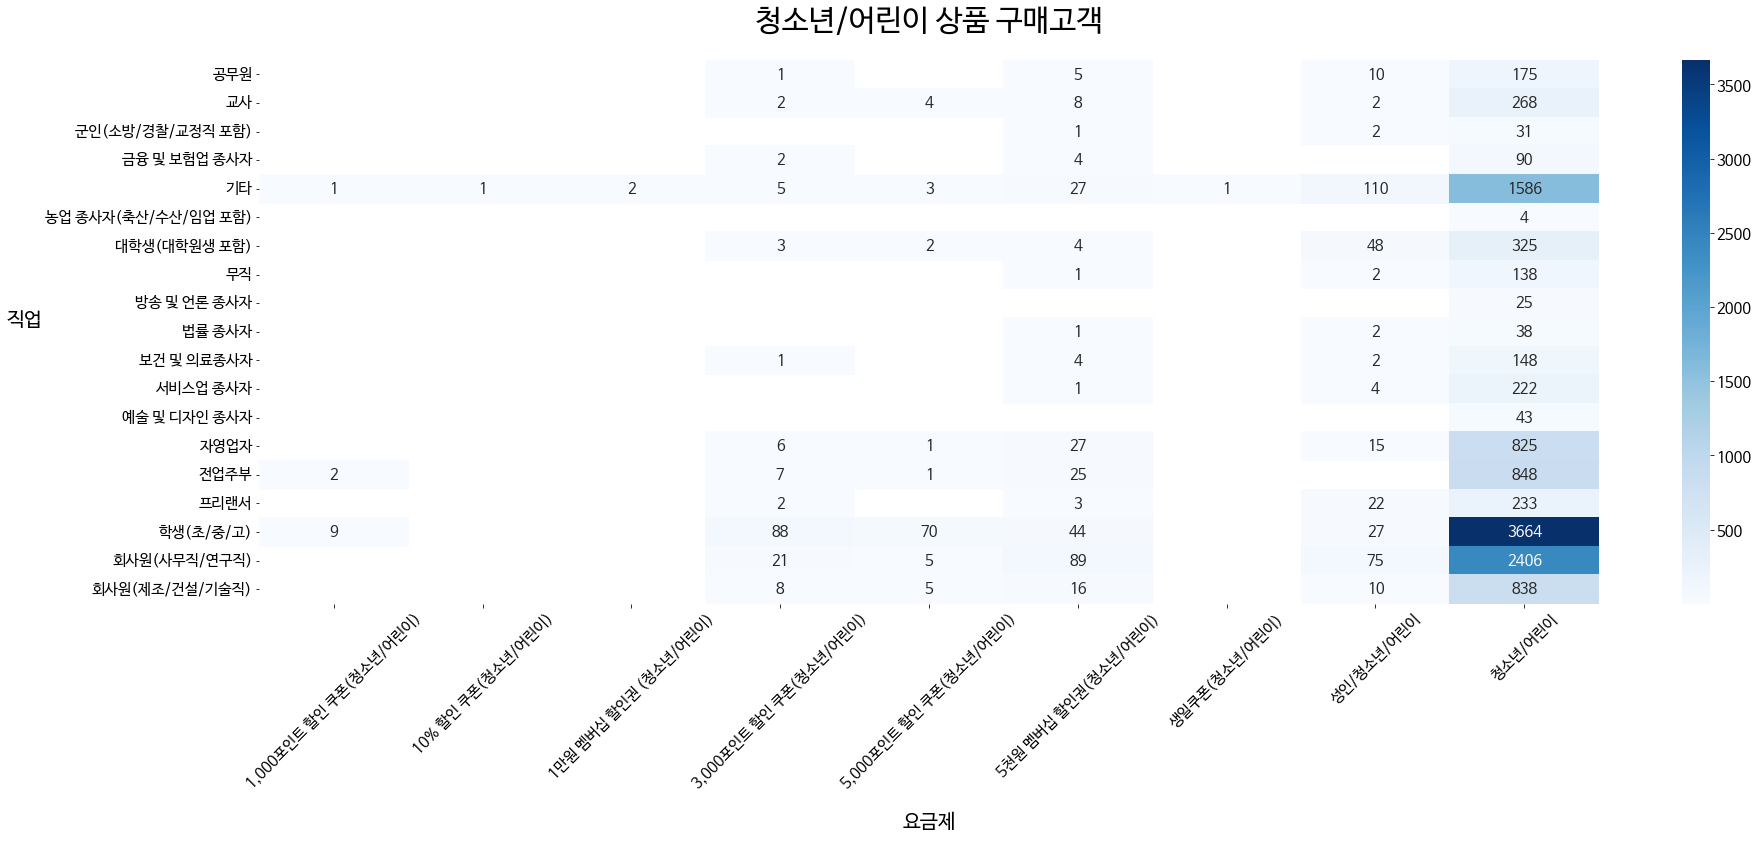

**직업을 기타 또는 미입력한 고객의 비중이 크다. 직업을 필수 입력 할 수 있도록 설계하는 것이 분류에 도움이 될 것이다.**


- 고객이 기타를 선택하지 않도록 직업카테고리 세분화
- 기타 또는 입력하지 않은 고객이 직업을 입력 할 경우 할인쿠폰 증정
- 직업이 학생(초/중/고)인데 성인 일반인 결제를 한 경우가 많음 => 고객의 나이에 따라 최신화 필요

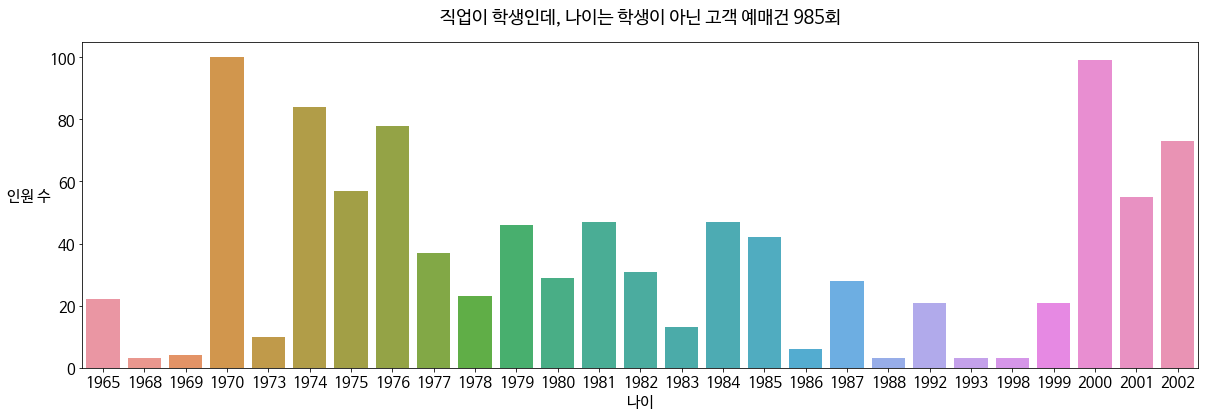

---

### (가설1)직전 경기 결과에 따른 관객 수

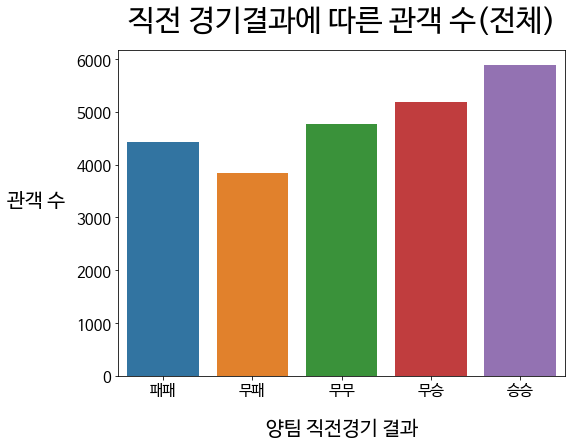

- 전체 경기장을 확인해본 결과 직전 경기를 이긴 경우 더 많은 관객이 오는 것을 확인하였다.

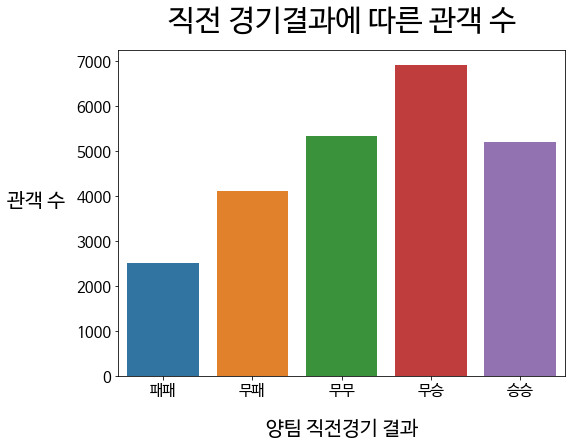

- 인천 경기장에서는 두 팀이 직전 경기를 패배한 경우 평균적으로 관객 수가 낮았다.

- 두 팀 모두 승리했을 경우가 가장 높지는 않았지만 어느정도 영향은 있어보인다.


---

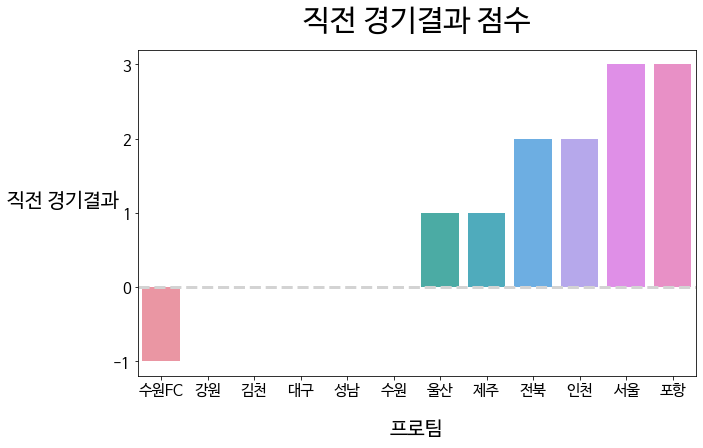

- 인천경기장의 팀별 직전경기 결과 점수의 합계

- 직전 경기를 (승리 : 1점 / 무승부 : 0점 /  패배 : -1점)

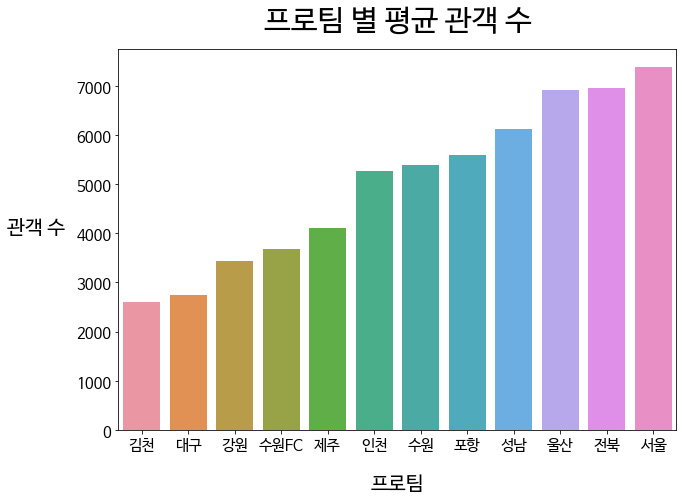


- 위의 점수가 높을수록 관람객이 많을까?

- 확인 결과 직전경기 결과가 안좋은 팀들이 평균 관객수도 낮은 편이다.

---

### (가설1)순위에 따른 관객 수

**순위별 평균 관객 수**
- 인천팀 홈경기 데이터를 보았을 때
- 순위가 높을수록 관객이 많아지는 경향이 있는 것으로 보인다.

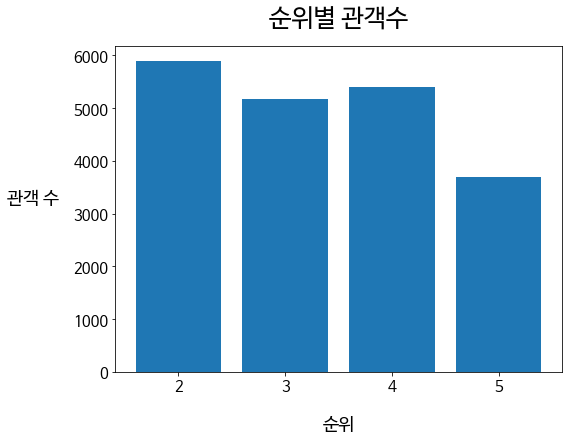

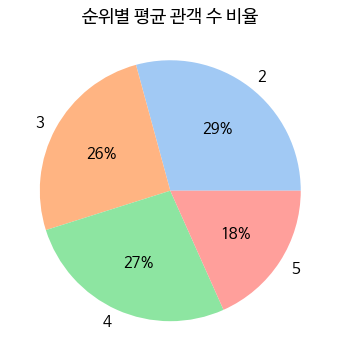

**순위별 관객 수를 개별로 확인해보았다.**
- 큰 상관관계가 없는 것으로 보인다.
- 오히려 순위변동이 있을 때 관객 수가 눈에 띄게 변하는 것을 볼 수 있다.

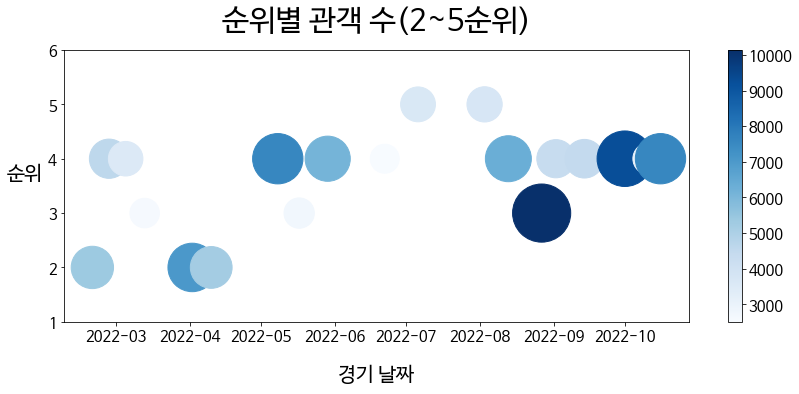

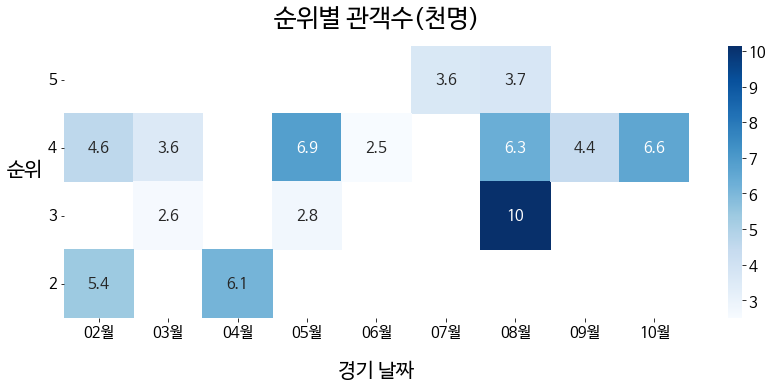

---

### (가설2) 새로운 패턴의 고객

#### 1. 경기를 예매하는 시간

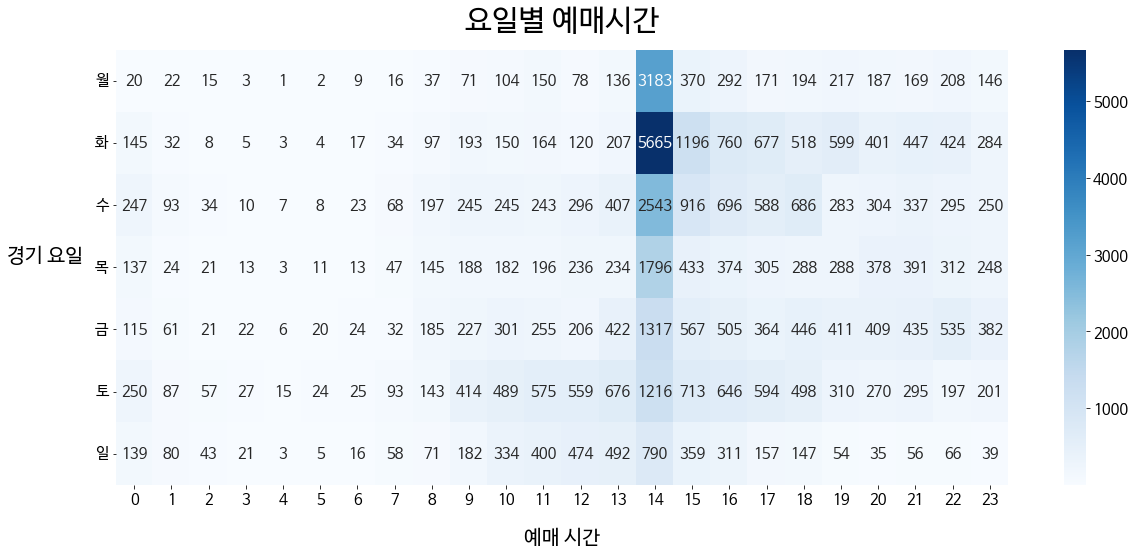

- 요일별로는 화요일, 수요일 순으로 많이 나타났다.
- 대부분 14시에 예매를하는 것으로 나타났다.

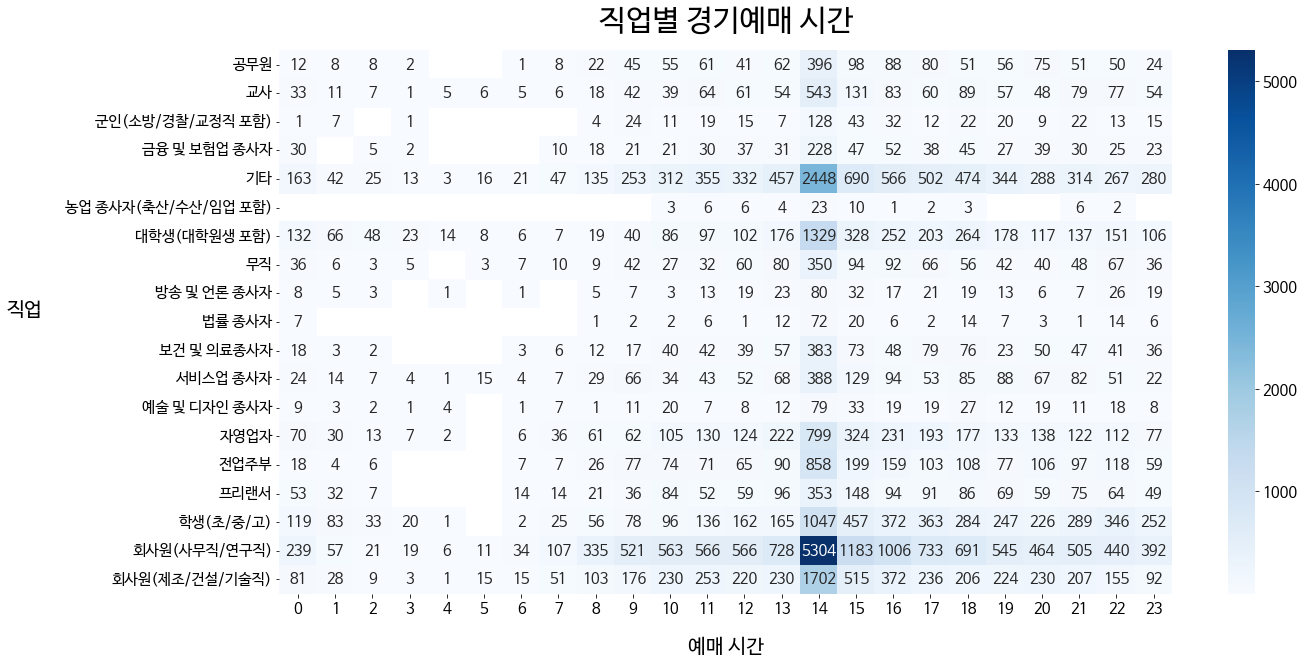

- 직업별로는 회사원이 두드러졌으며, 기타또는 미입력 한 경우가 가장 많았다.
- 기타에 존재하는 고객의 비중이 높은 편이다.
- 고객 세분화를 위해 직업목록을 늘리거나 회원가입을 성실하게 작성할 경우 쿠폰을 지급하는 혜택을 제공하여 데이터를 수집한다.
- 또 기존 고객에 대해서도 기타 또는 미입력 고객이 정보를 변경할 수 있도록 행사를 진행한다.

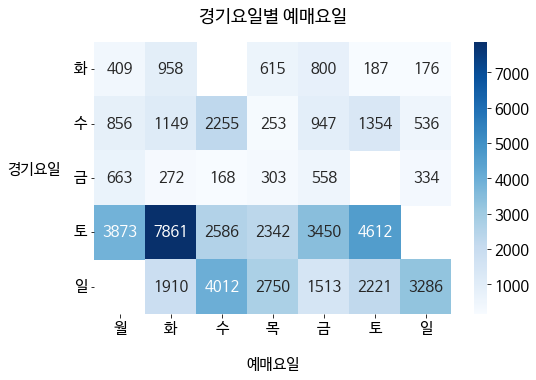

- 경기 종료 후 3일 뒤와 경기 당일에 예매가 가장 많은 것으로 나타났다.
- 위에서 보았듯이 화,수에 예매가 몰리는 경향이 있는데 이는 수,토,일 경기의 영향으로 보인다.
- 화요일, 수요일 14시에 고급좌석 얼리버드 할인행사를 진행하면 노출을 증가시킬 수 있다.

---

당일 예매자

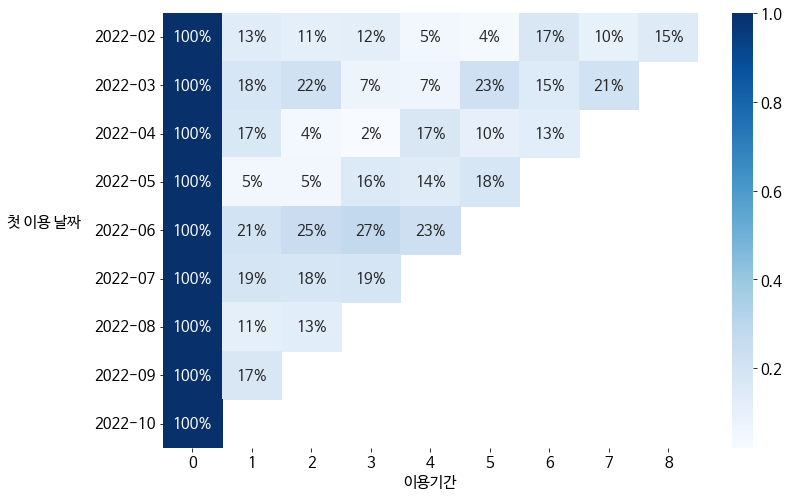

- 당일 예매자의 리텐션 코호트분석을 진행한 결과 당일 예매를 하는 사람들은 꾸준히 당일 예매로 이용하는 것을 알수 있다.
- 당일 예매자 대상 할인행사 또는 당일 예매자를 예약예매로 유도하는 행사를 진행하여 예매예측이 가능하도록 한다.

---

#### 2. 경기 횟수가 잦을수록 관객이 늘어난다.

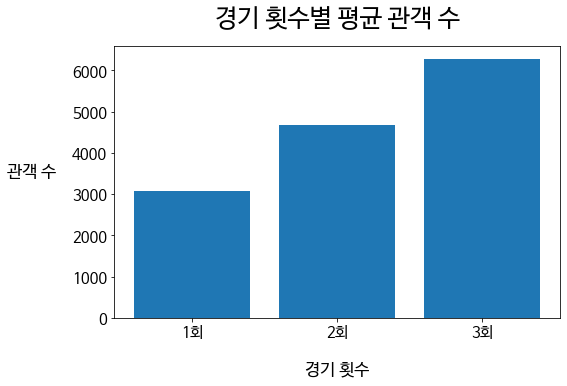

- 한 달에 경기 횟수가 많을수록 평균관객의 수가 많아지는 것으로 나타났다.
- 관객이 많을수록 일반좌석의 쾌적함은 떨어지므로 고급좌석 할인쿠폰을 제공하여 구매를 유도할 수 있다.

---

#### 3 .원정, 홈

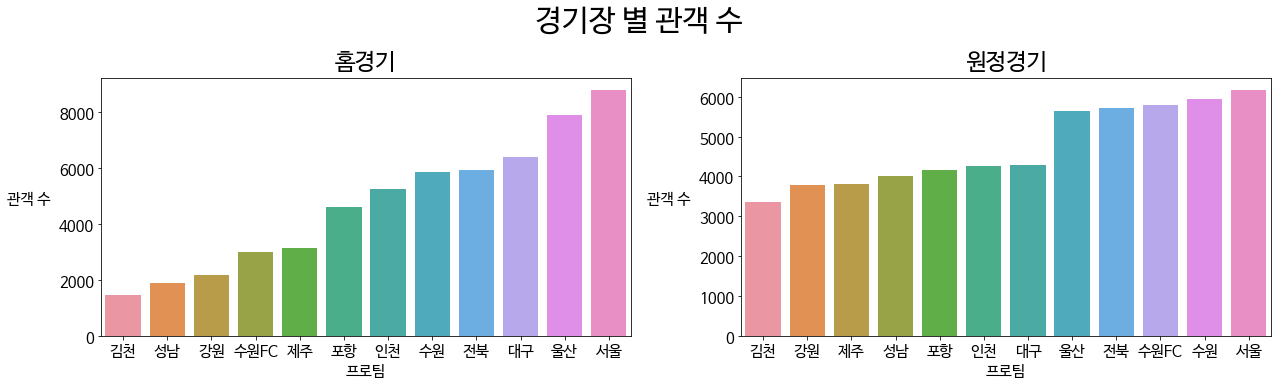

- 평균적으로 홈경기 관람객이 원정경기 관람객보다 많았다.

- 모든 경기장이 이런지 비율을 확인해봤다.

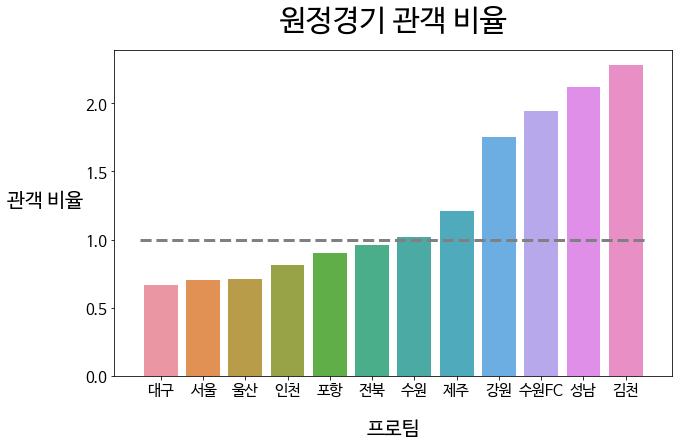

- 확인 결과, 인천경기장은 홈경기 관객 비중이 높은편이다.
- 관객 비율 = 원정경기 평균관객수 / 홈경기 평균 관객 수

### (가설3) 구매유도에 응하는 고객이 존재하는가?

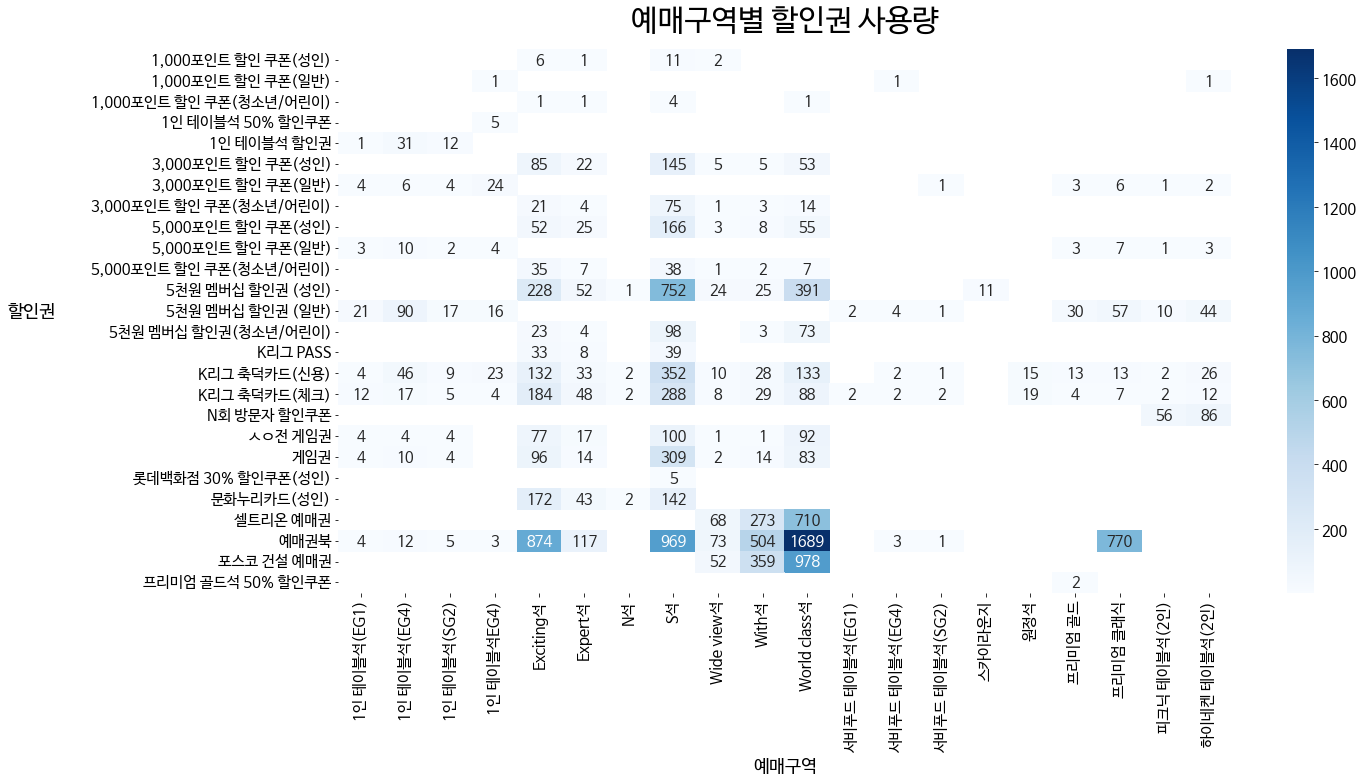

- 5천원 멤버십 할인권은 s석에 가장 많이 사용되었다.
- 예매권북의 사용량이 가장 많고, 주로 Wolrd Class석에서 많이 이용한다.
- 프리미엄 클래식구역도 예매권북의 사용이 두드러진다.
- 주로 할인율이 높은 쿠폰을 고급좌석에 사용하고 낮은 쿠폰을 일반좌석에 사용한다.

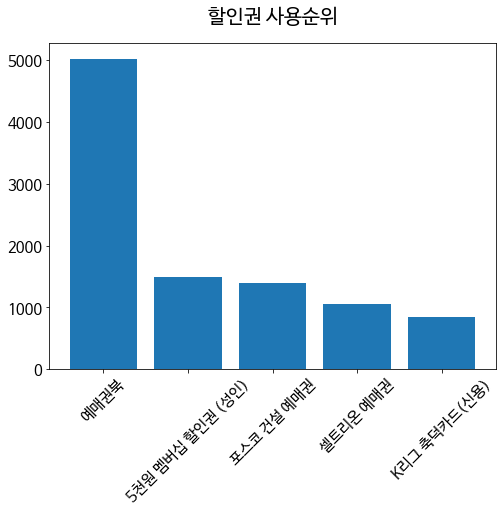

- 가장 많이 사용된 할인은 예매권북이었으며, 예매권과 카드할인이 할인쿠폰보다 대체로 인기가 좋다.

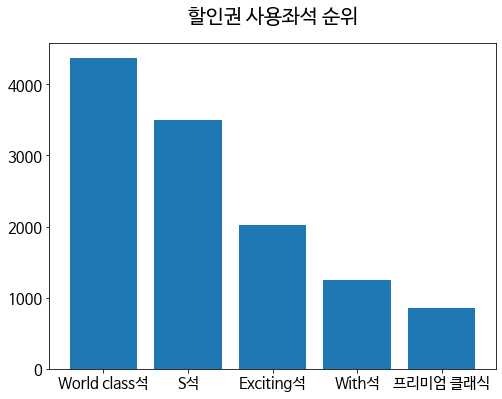

- 할인쿠폰이 가장 많이 사용된 좌석은 Wolrd Class석

---

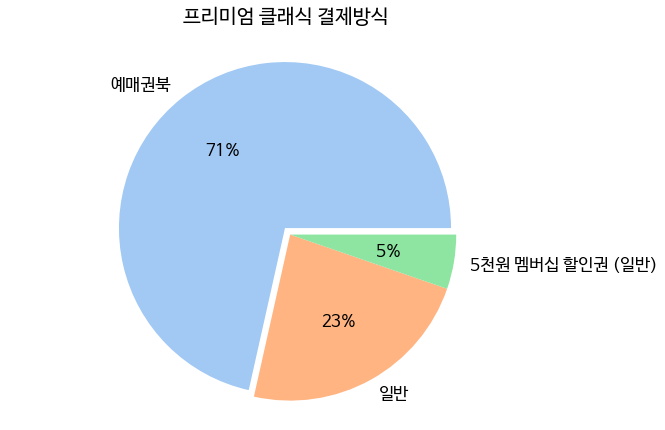

- 프리미엄 클래식 좌석의 예매 내역을 분석해본 결과 예매권북이 71%였다.

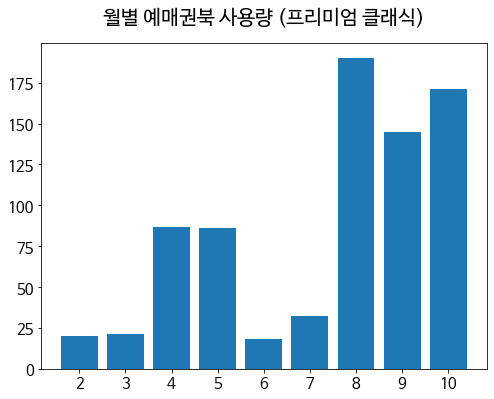

- 프리미엄 클래식 구역의 월별 예매권북 사용량이 다른지 조사해보았다.
- 하반기에 사용이 두드러지는 것을 알 수 있다.

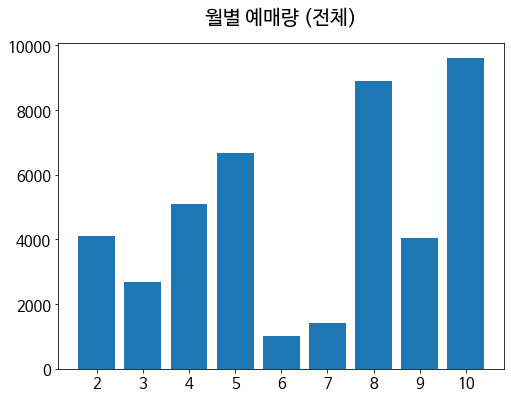

- 전체 예매량도 비슷한 추이를 보이는 것을 보아 관객이 많을수록 고급좌석 수요도 늘어나는 것을 알 수 있다.
- 즉, 관객이 많이 올 것으로 예상되는 시기에 고급좌석 할인행사를 진행한다.

---

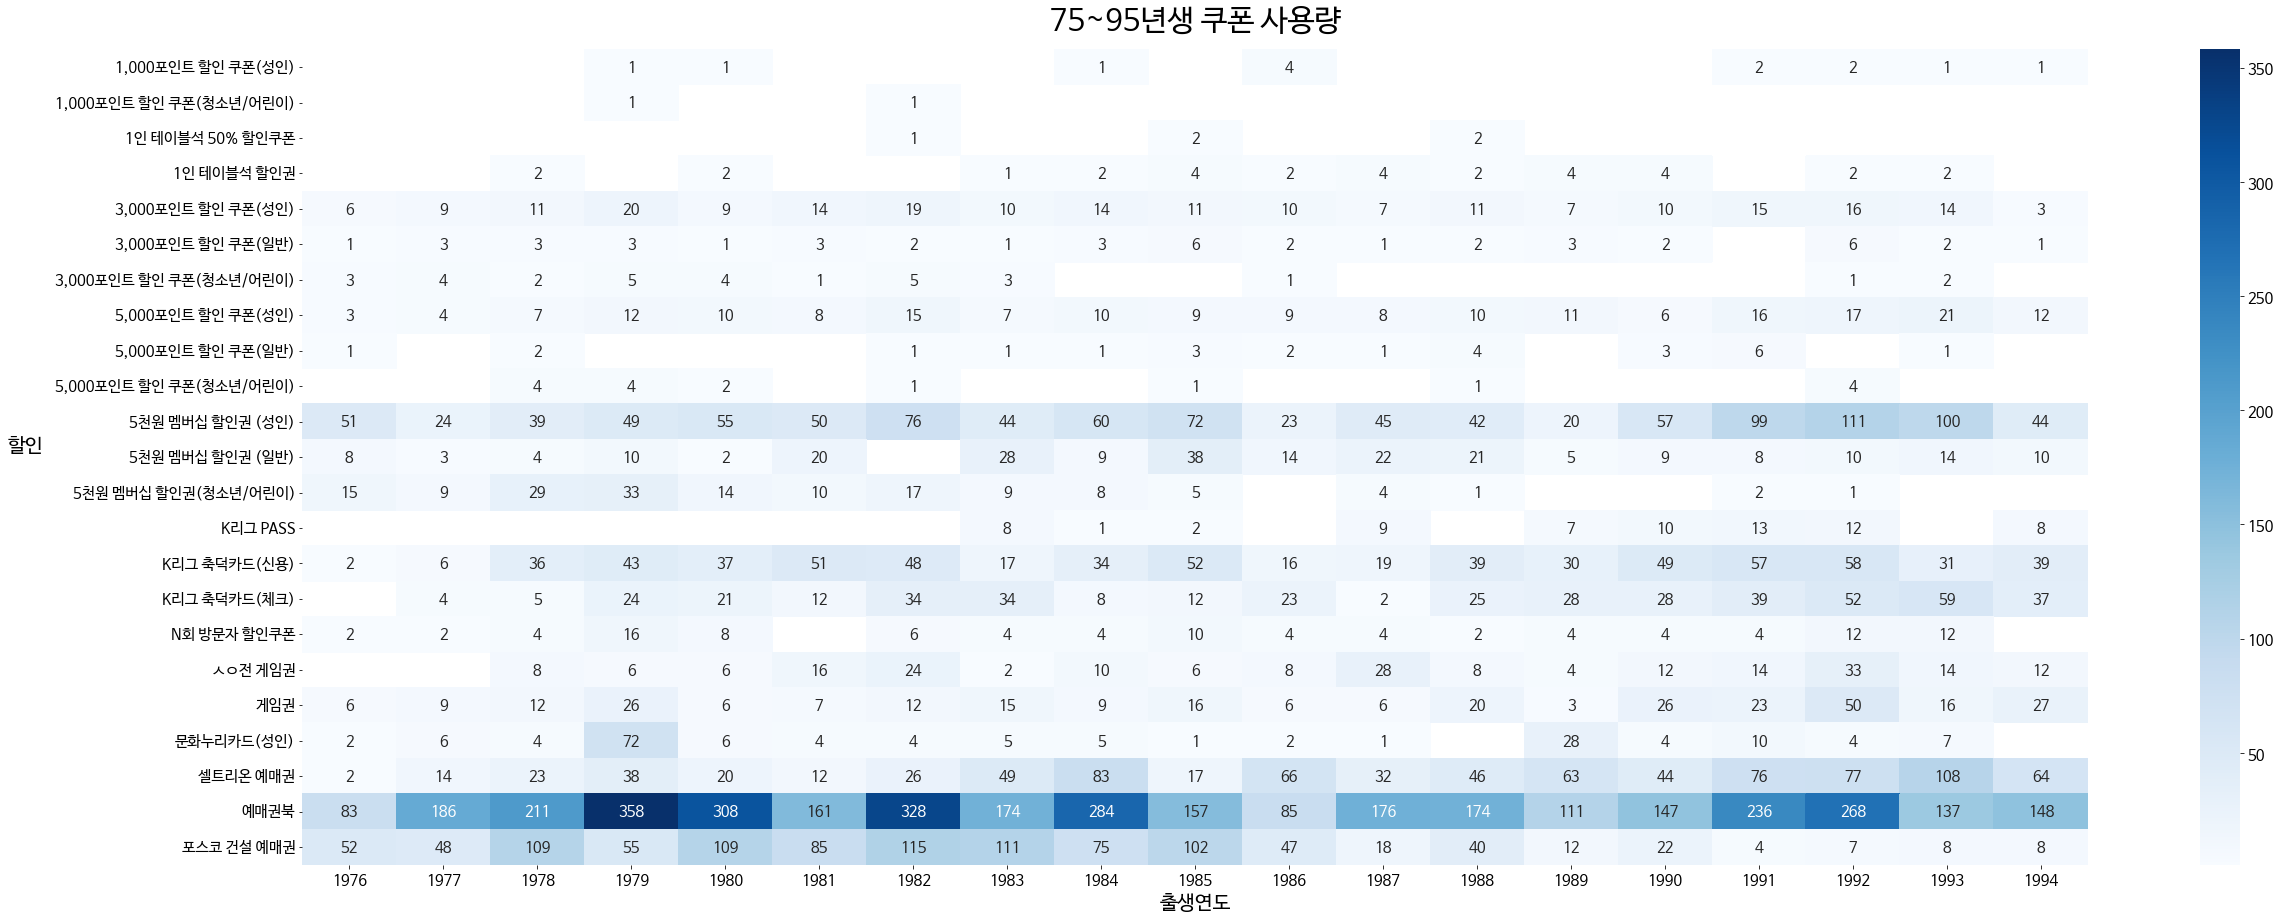

- 75년~95년생에서 할인쿠폰 사용자가 전체의 71%를 차지했다.
- 이 구간을 대상으로 할인행사 진행

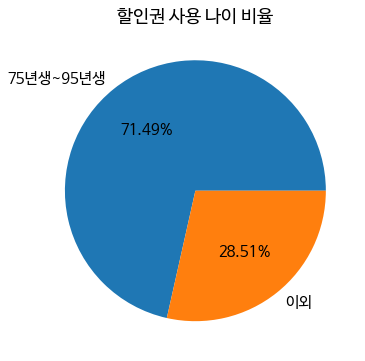

---

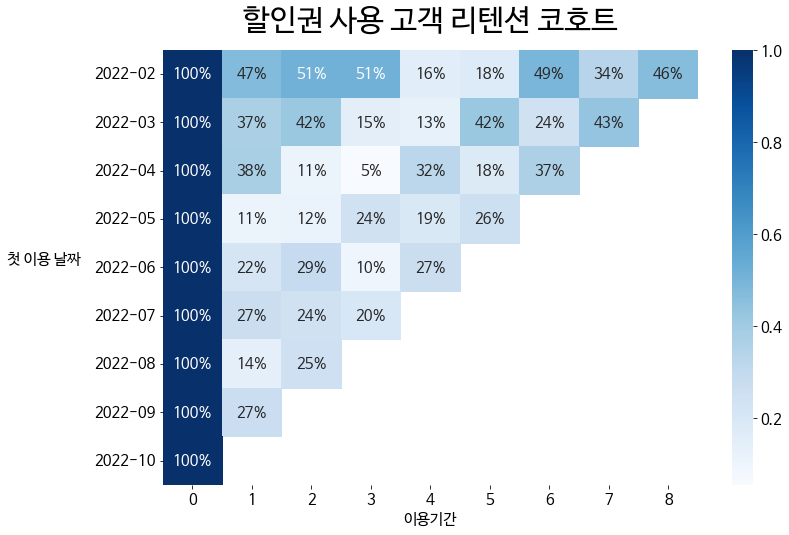

- 시즌 초반에 할인권을 이용한 고객일수록 유지율이 높다.
- 시즌 초반에 이벤트를 통하여 많은 고객을 확보해야 한다.

#### 결론

- 할인율이 높을수록 고급좌석에 이용하는 경향이 있다.
- 가격이 높은 좌석이 할인예매 비율이 높다.
- 관객 수가 많을수록 고급좌석의 수요가 올라간다.
- 예매권이나 카드 할인형 이벤트가 사용률이 높다.
- 75~95년생의 할인 호응도가 높다.
- 할인권을 시즌 초반에 사용하는 고객이 유지율이 좋으므로 시즌 초반에 많은 행사를 진행한다.

---

### (가설4) 고급좌석 예매 예측

#### 고급좌석 이용자 분석

- 고급좌석과 테이블석의 이용자들은 누구일까?
- 70~90년생 회사원, 공무원, 기타 이용자
- 청소년/어린이 상품의 구매이력이 거의 없는 고객

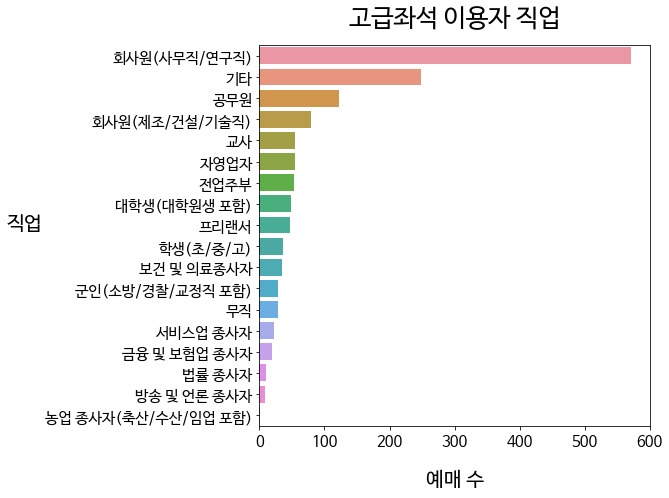

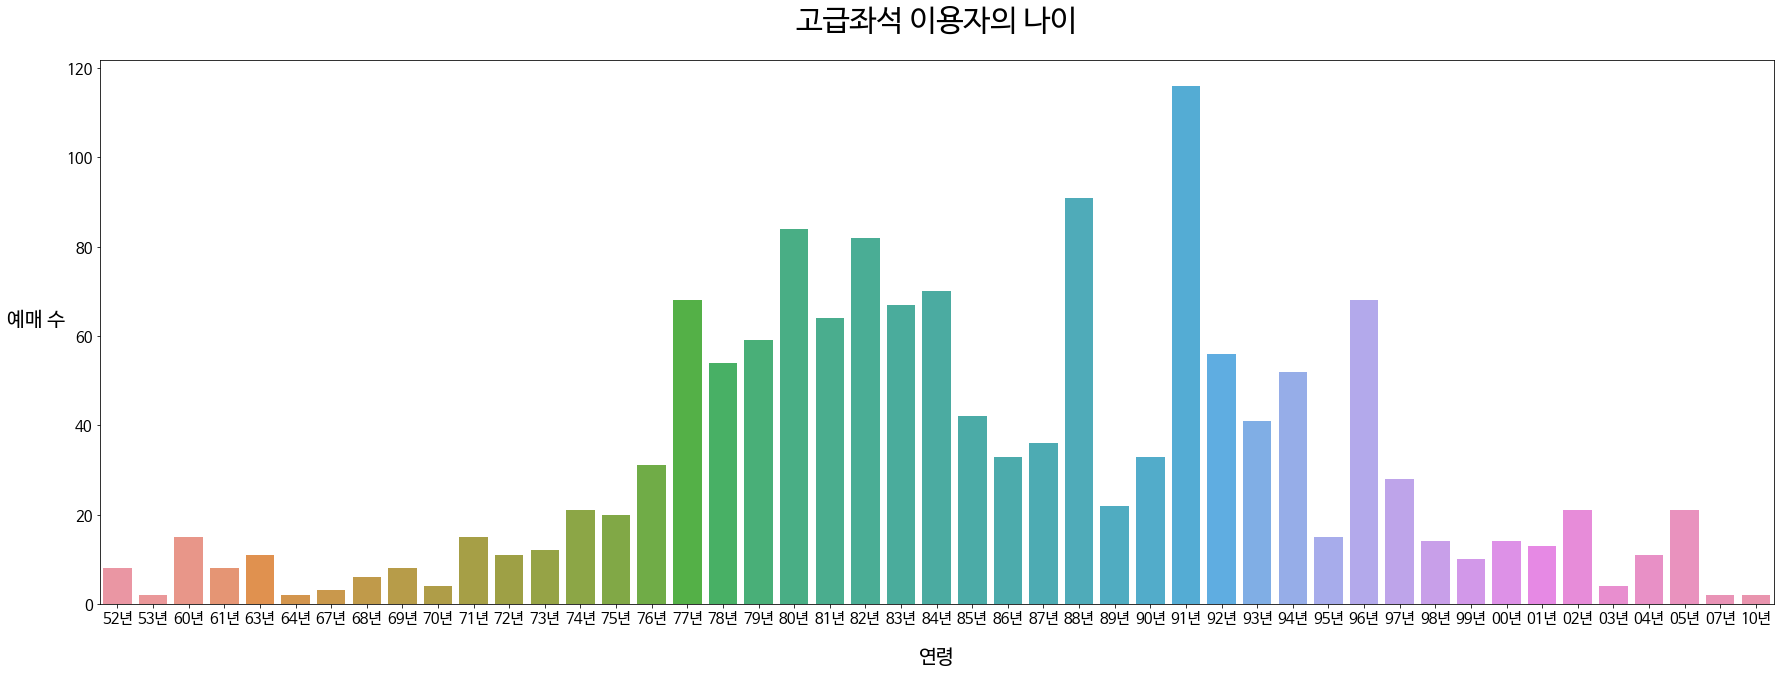

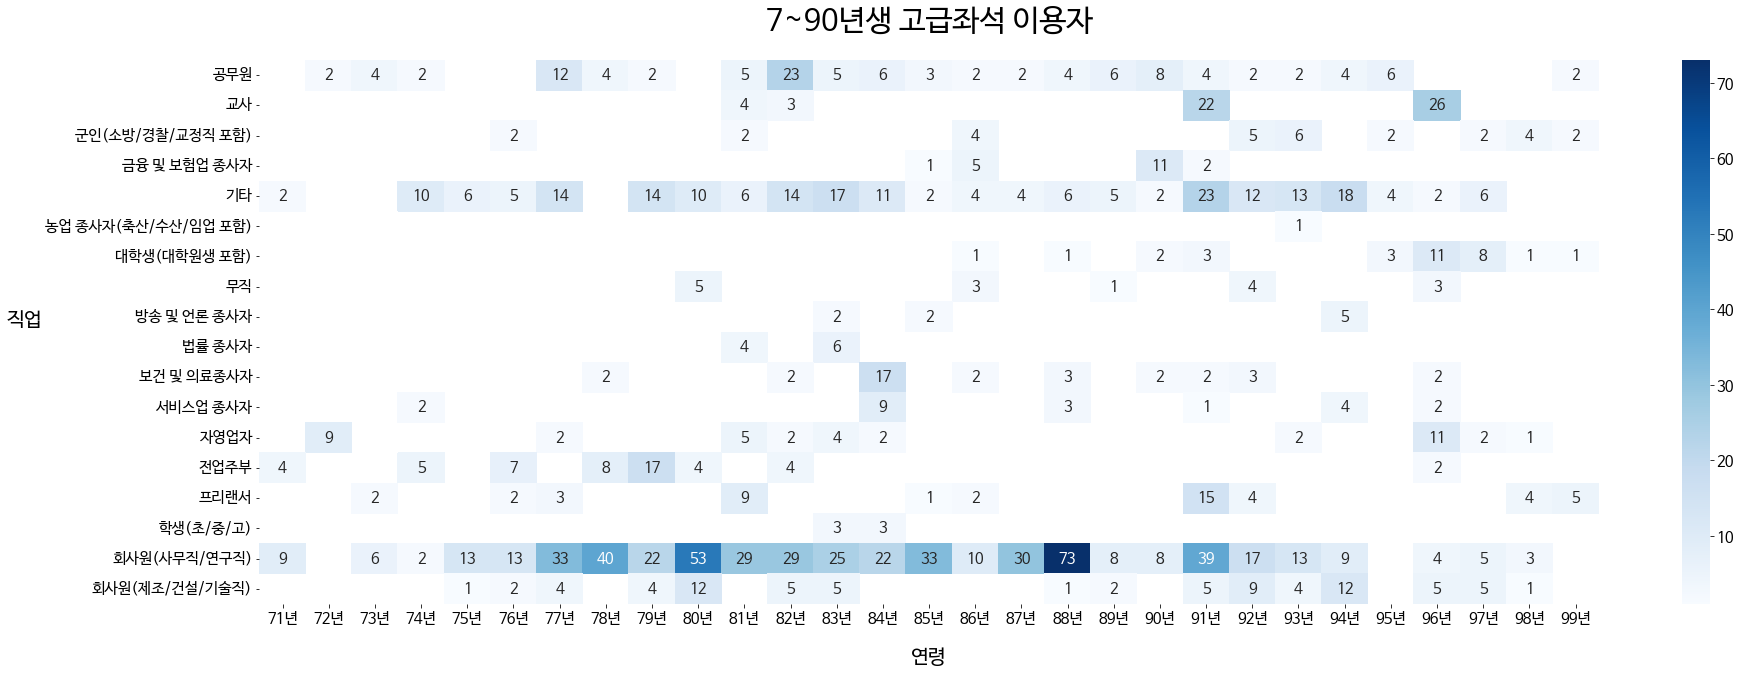

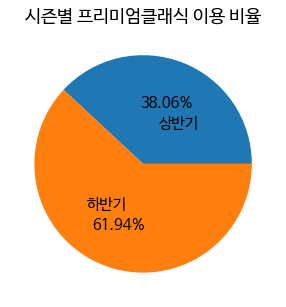

- 프리미엄 클래식구역은 하반기에 사용자가 더 많은것으로 나타났다.
- 프리미엄 클래식구역은 예매권북 사용자가 71%이다.
- 예매권북이 있는 사용자에게 하반기 할인쿠폰을 주는 것은 의미가 없으니 상반기에 고급석 할인쿠폰을 지급하면 구매할 확률이 높다.

#### 테이블석 이용자분석

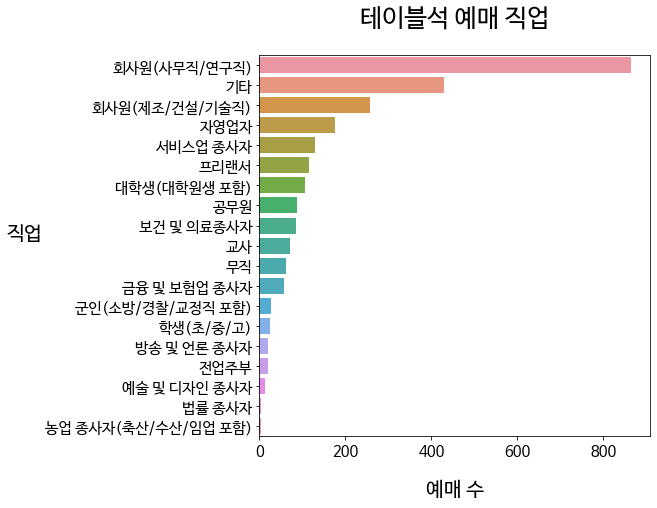

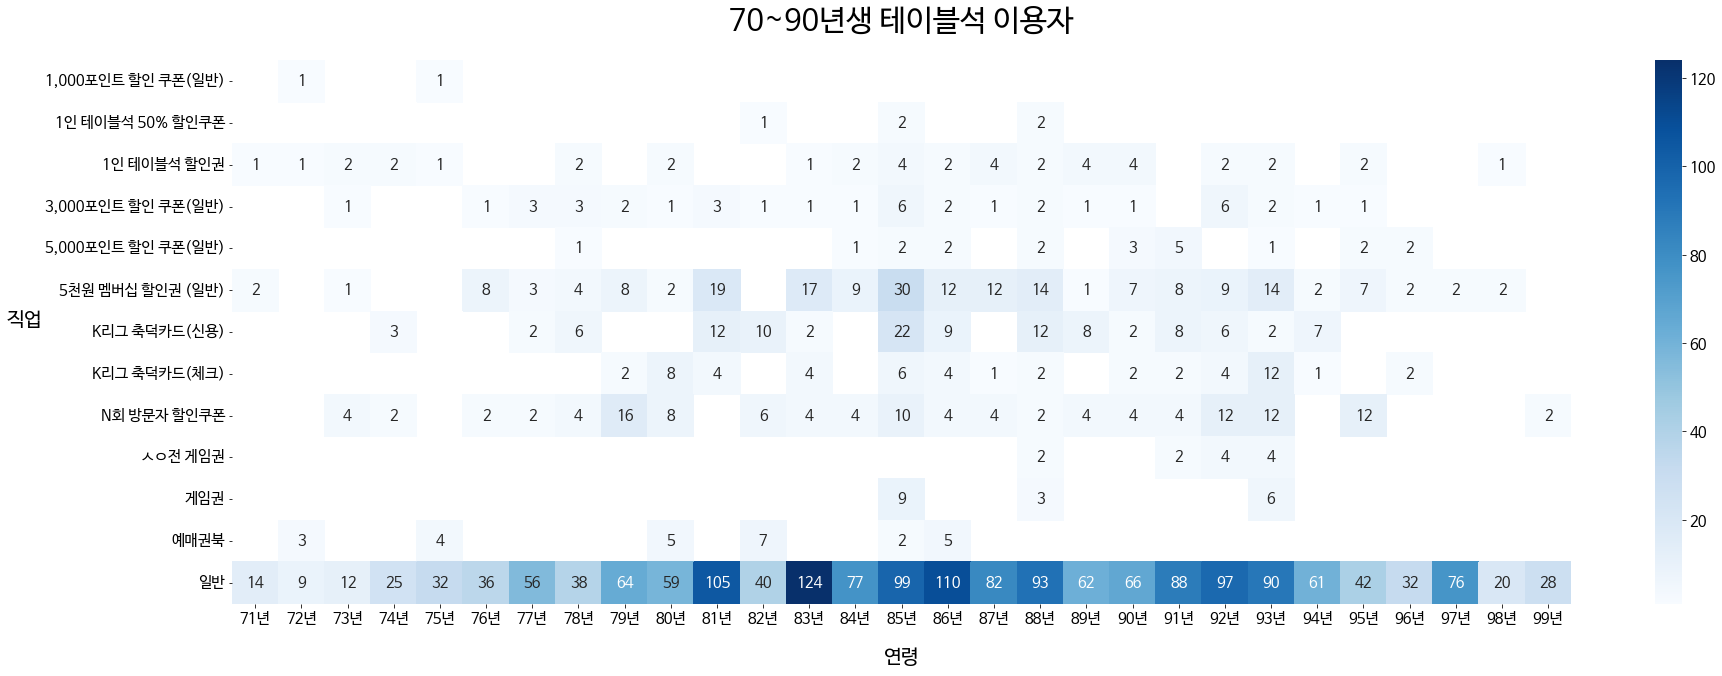

- 고급좌석과 마찬가지로 70~90년대 회사원이 주류를 이루며 청소년/어린이 구매이력이 없는 고객들이다.
- 테이블석은 예매권북의 판매가 저조한 것을 알 수 있다.
- 따라서 추가적인 할인 행사를 진행하면 수요를 더 끌어올릴 수 있을 것으로 보인다.